# Wine Quality Clustering and Predictions

## Project Goals

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* identify features of wine that influence wine quality
</br>

* identify best features to use in order to cluster data points
</br>

* use classification models to predict wine quality
    


# Imports used:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import prepare
import acquire
import model
import explore

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

seed = 42


## Acquire

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* Wine data was obtained from data.world
</br>

* Data was obtained 1/30/2023
</br>

* Dataframe had 6,497 rows by 14 columns before preparing
</br>

* Each row represents a wine and each column is a feature of that wine
    

In [2]:
# function aquires wine data from csv file in repo
df = acquire.get_wine()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Prepare

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* There were no null values in the dataset
</br>

* columns were renamed to include underscore
</br>

* outliers were identified and removed from each column
</br>

* Each row represents a wine and each column is a feature of that wine
    

In [3]:
#This function takes in a dataframe, 
#the threshold and a list of columns 
#and returns the dataframe with outliers removed

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
# cols above are the columns we want to check and remove outliers
df = prepare.remove_outliers(df, 2.5, cols)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


# Exploration:

* How many wines of each quality are there?
* Do fixed acidity and volatile acidity correlate?
* Does residual sugar and wine quality have a correlation?
* Does citric acid and pH correlate?
* Do sulphates vs free and total sulphur dioxides have a relationhip?
* Does density vs quality have a relationship?

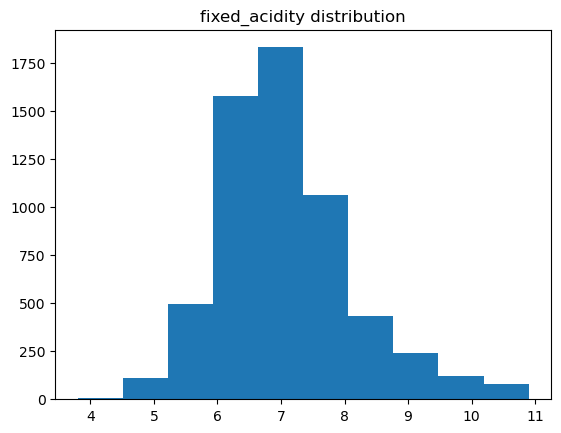

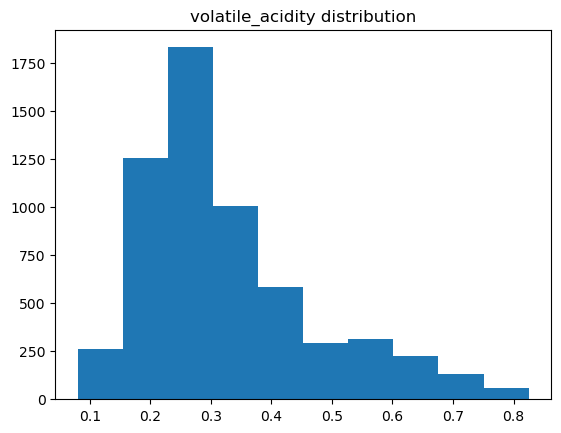

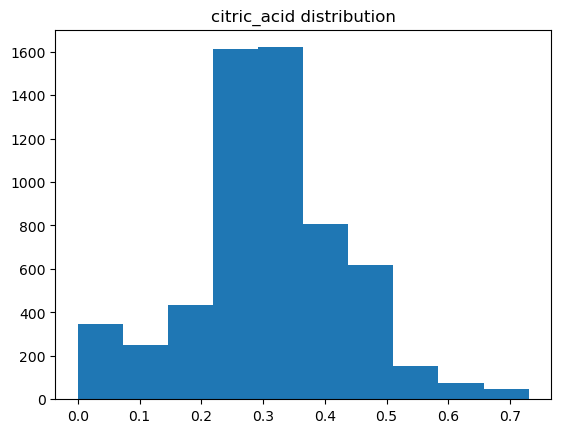

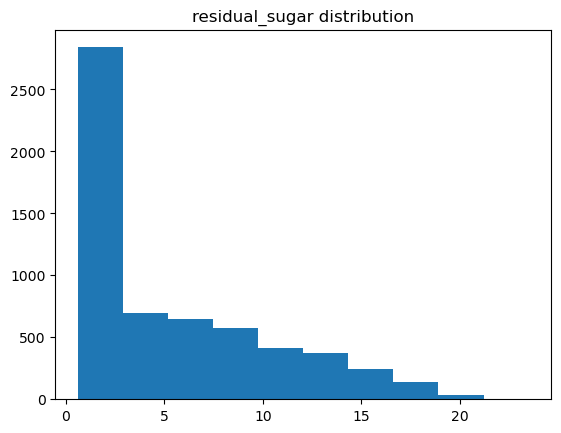

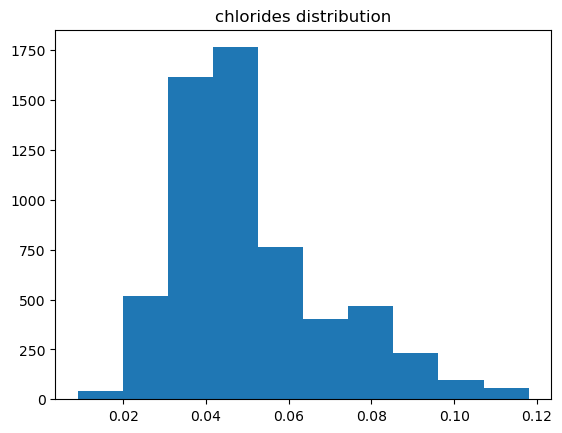

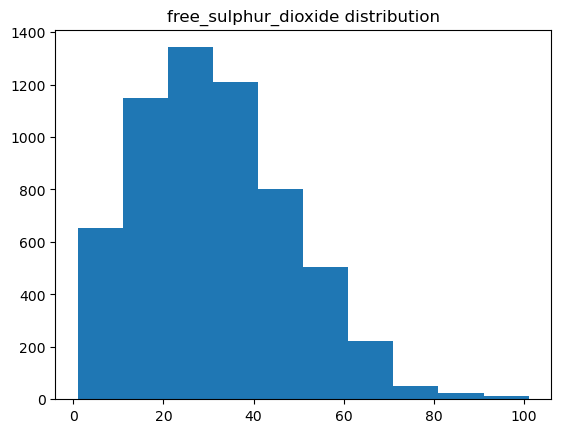

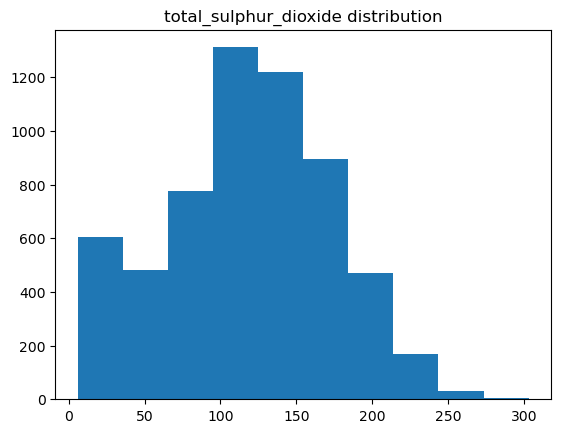

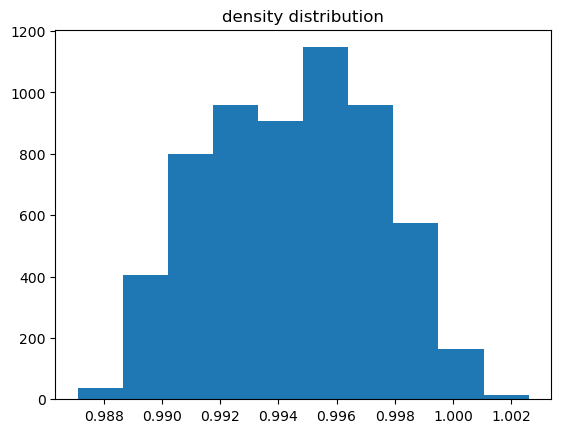

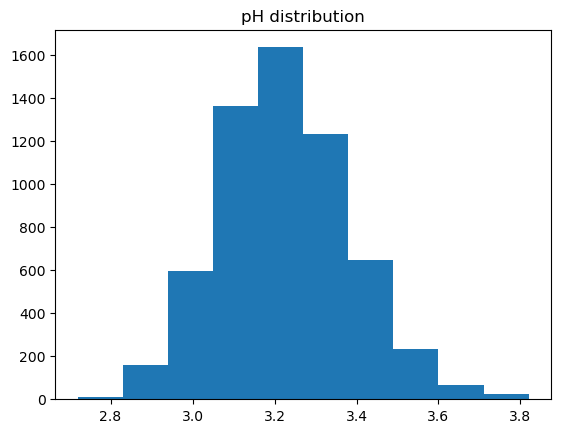

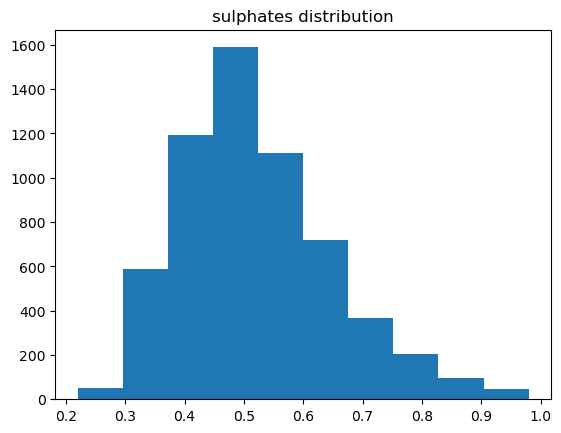

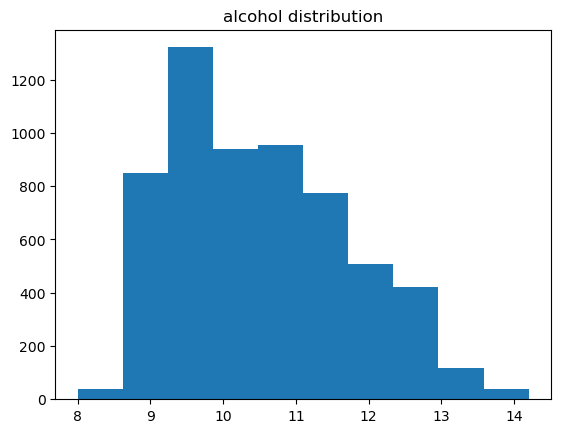

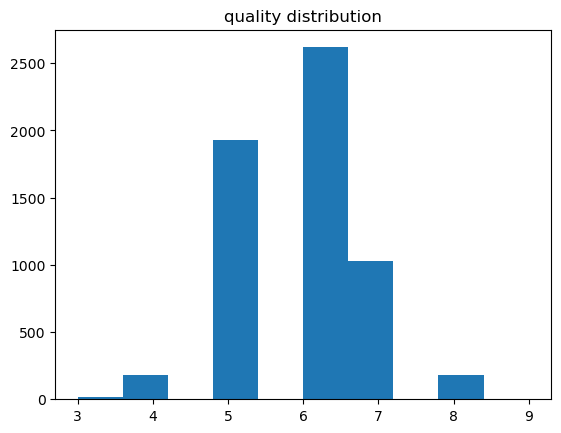

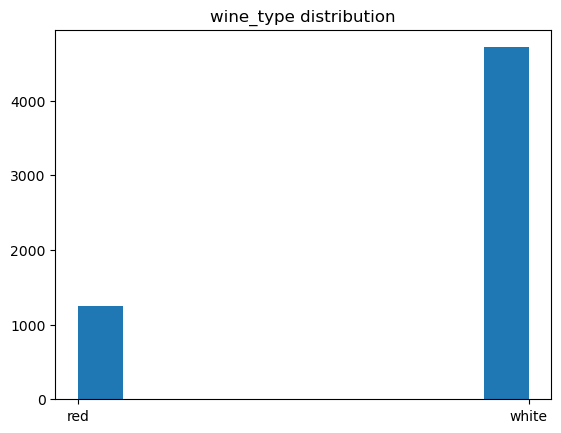

In [14]:
# snapshop distribution of all columns
for col in df.columns
    plt.hist(x = col, data = dfx
    plt.title(f'{col} distribution')
    plt.show()

In [15]:
#split data
train, validate, test = prepare.subset_df(df)

(3577, 13) (1193, 13) (1193, 13)


In [16]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.120,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white
4180,6.8,0.180,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red
4143,6.9,0.320,0.30,1.8,0.036,28.0,117.0,0.99269,3.24,0.48,11.0,6,white


# How many wines of each type fall into each quality?


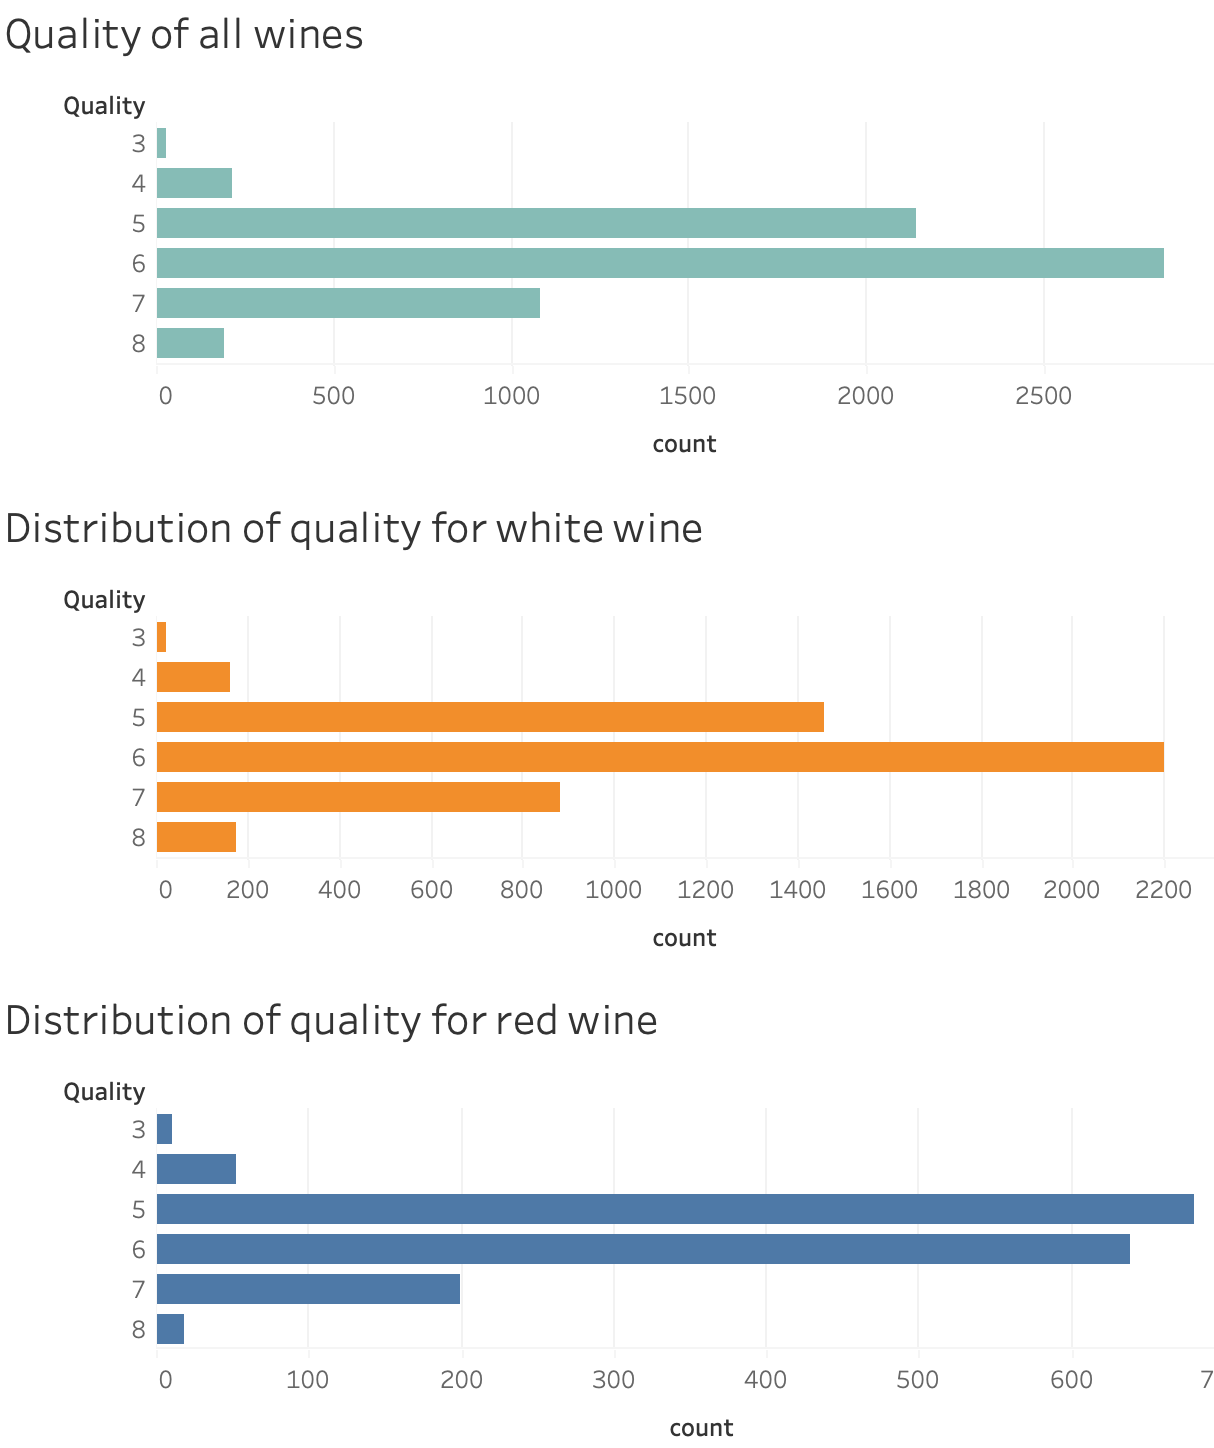

<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* It appears that the distribution of qualities for each type of wine are relatively similar

## Do fixed acidity and volatile acidity correlate?


$H_0$: There is no correlation

$H_a$: There is a correlation

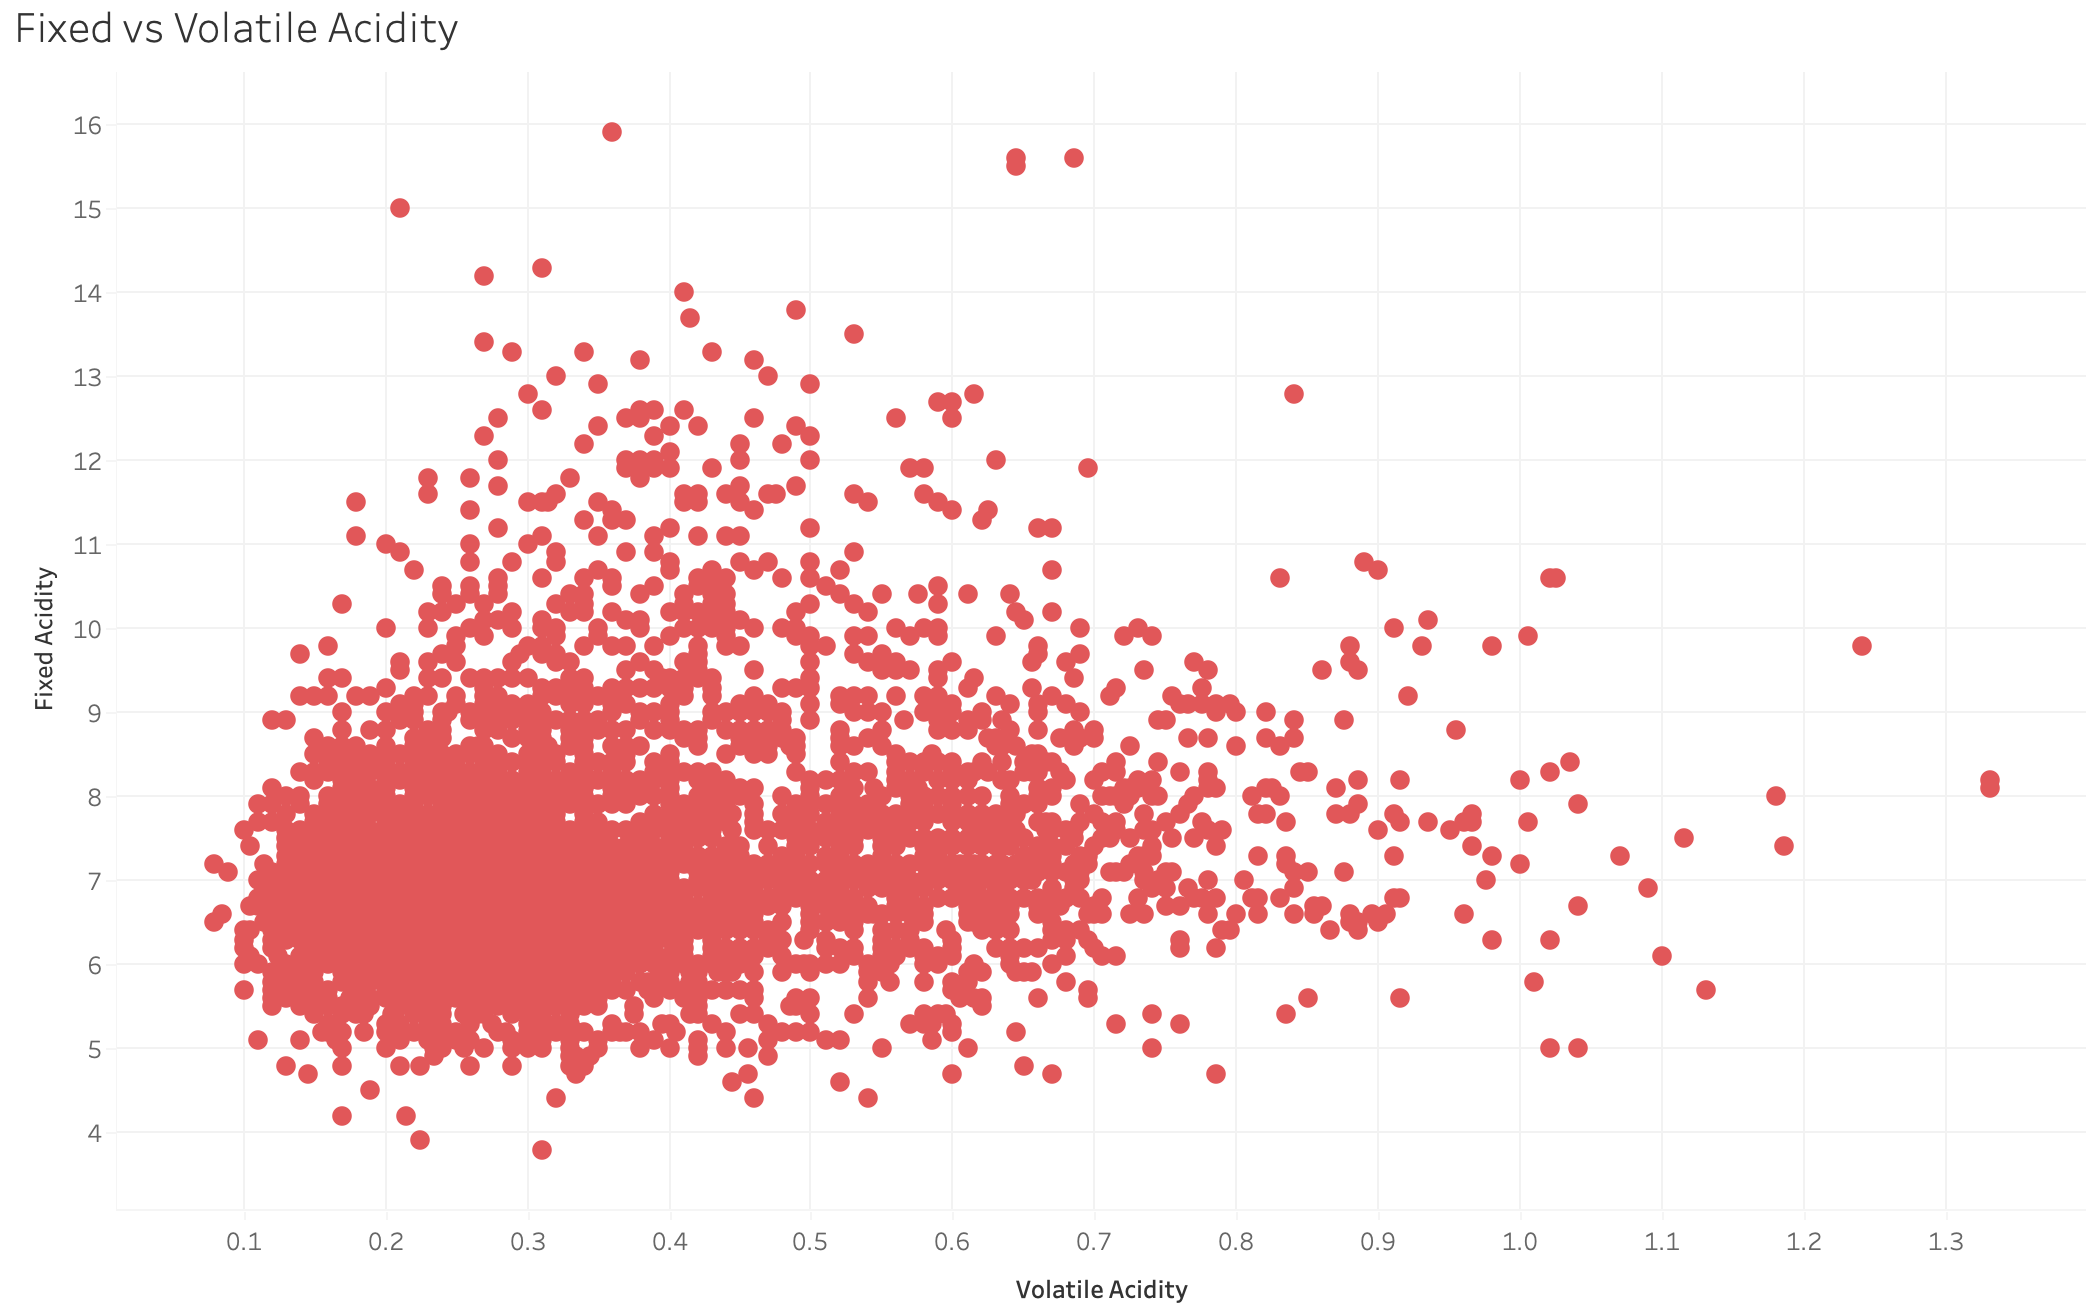

In [17]:
explore.pearsonr_report(train['fixed_acidity'], train['volatile_acidity'])

T-statistic = 0.1968
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr test, there is enough evidence to reject the null hypothesis and conclude that there is a correlation

## Does residual sugar and wine quality have a correlation?

$H_0$: There is no signifigant relationship between residual sugar level and wine quality.

$H_a:$: There is a signifigant relationship between residual sugars and wine quality

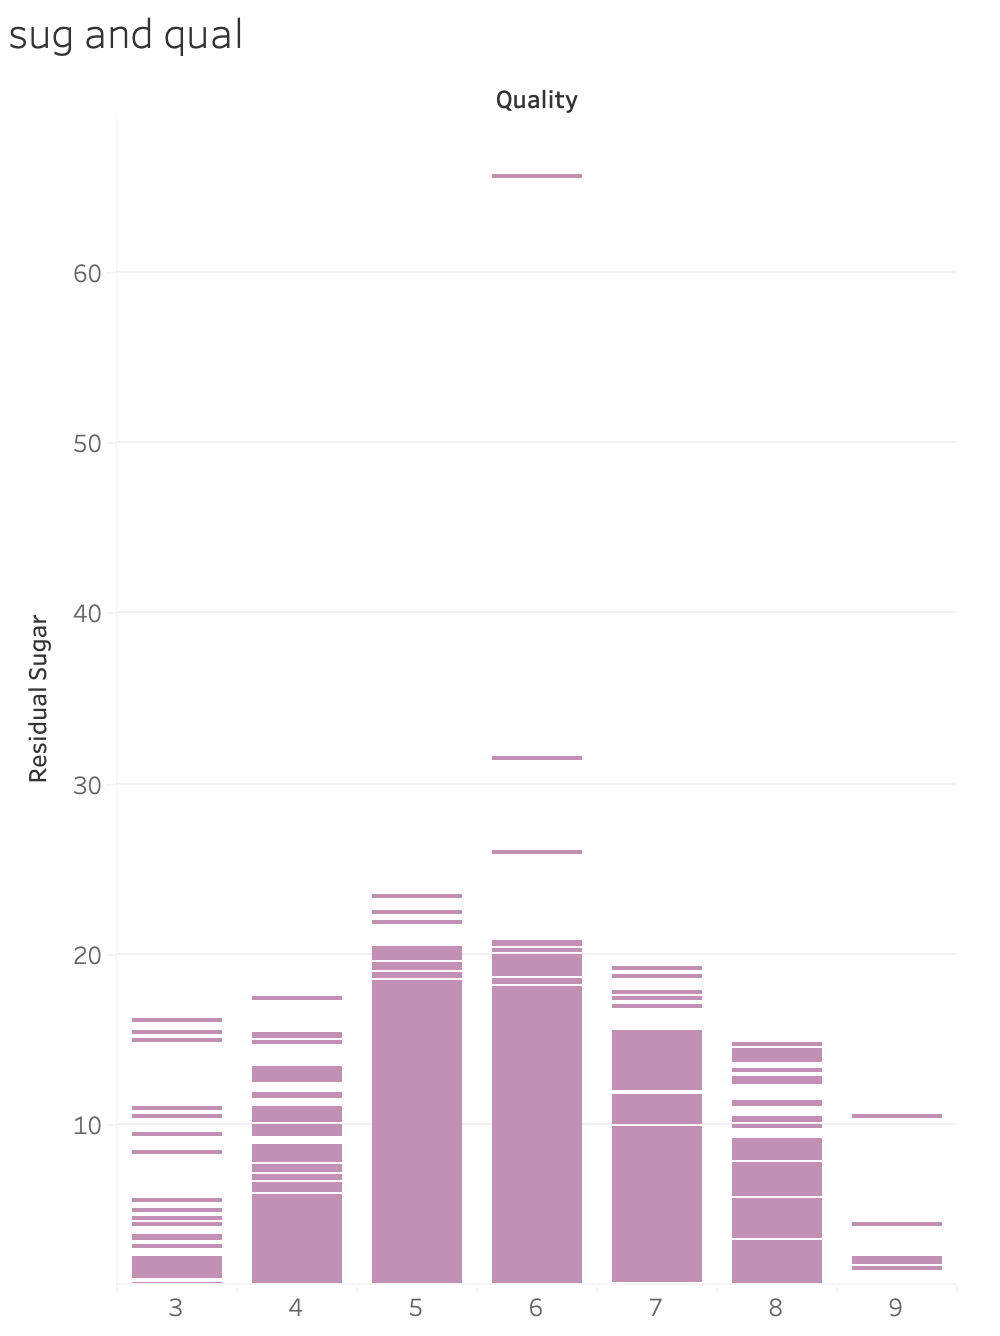

In [18]:
explore.mannwhitney_report(train['residual_sugar'], train['quality'])

T-statistic = 4871613.5000
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the nonparametric correlation statistical test, there is a very significant relationship between residual sugar and wine quality

## Does citric acid and pH levels have a correlation?

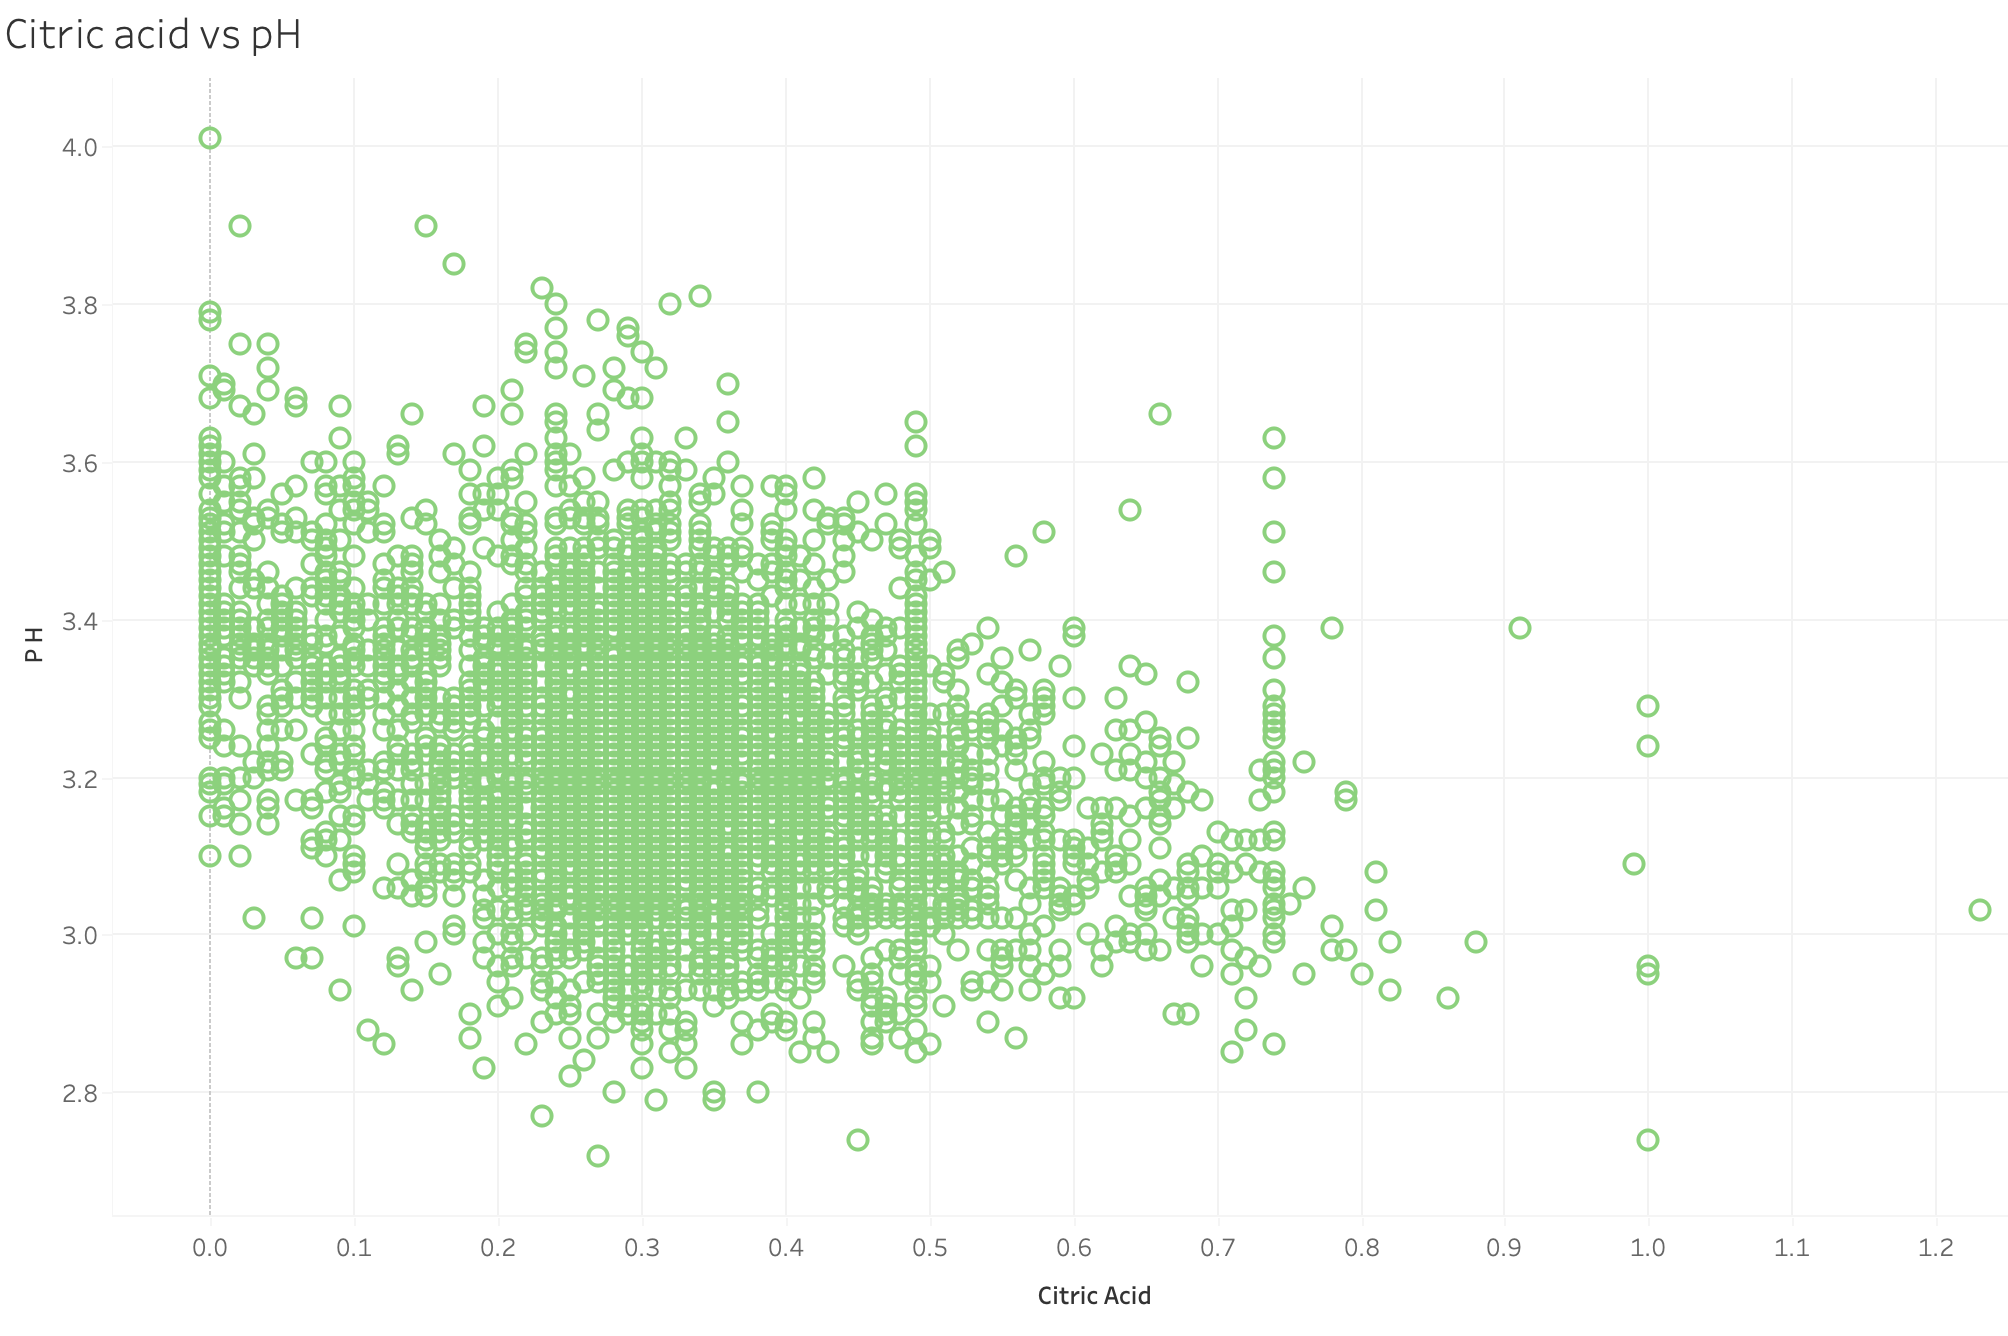

In [19]:
explore.pearsonr_report(train['citric_acid'], train['pH'])

T-statistic = -0.3026
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr statistical test, there is enough evidence to reject the null hypothesis and conclude that there is a negative correlation between pH and citric acid

## Does free or total sulfur dioxide and sulphates have a relationship?

$H_0$: There is no relationship

$H_a$: There is a relationship

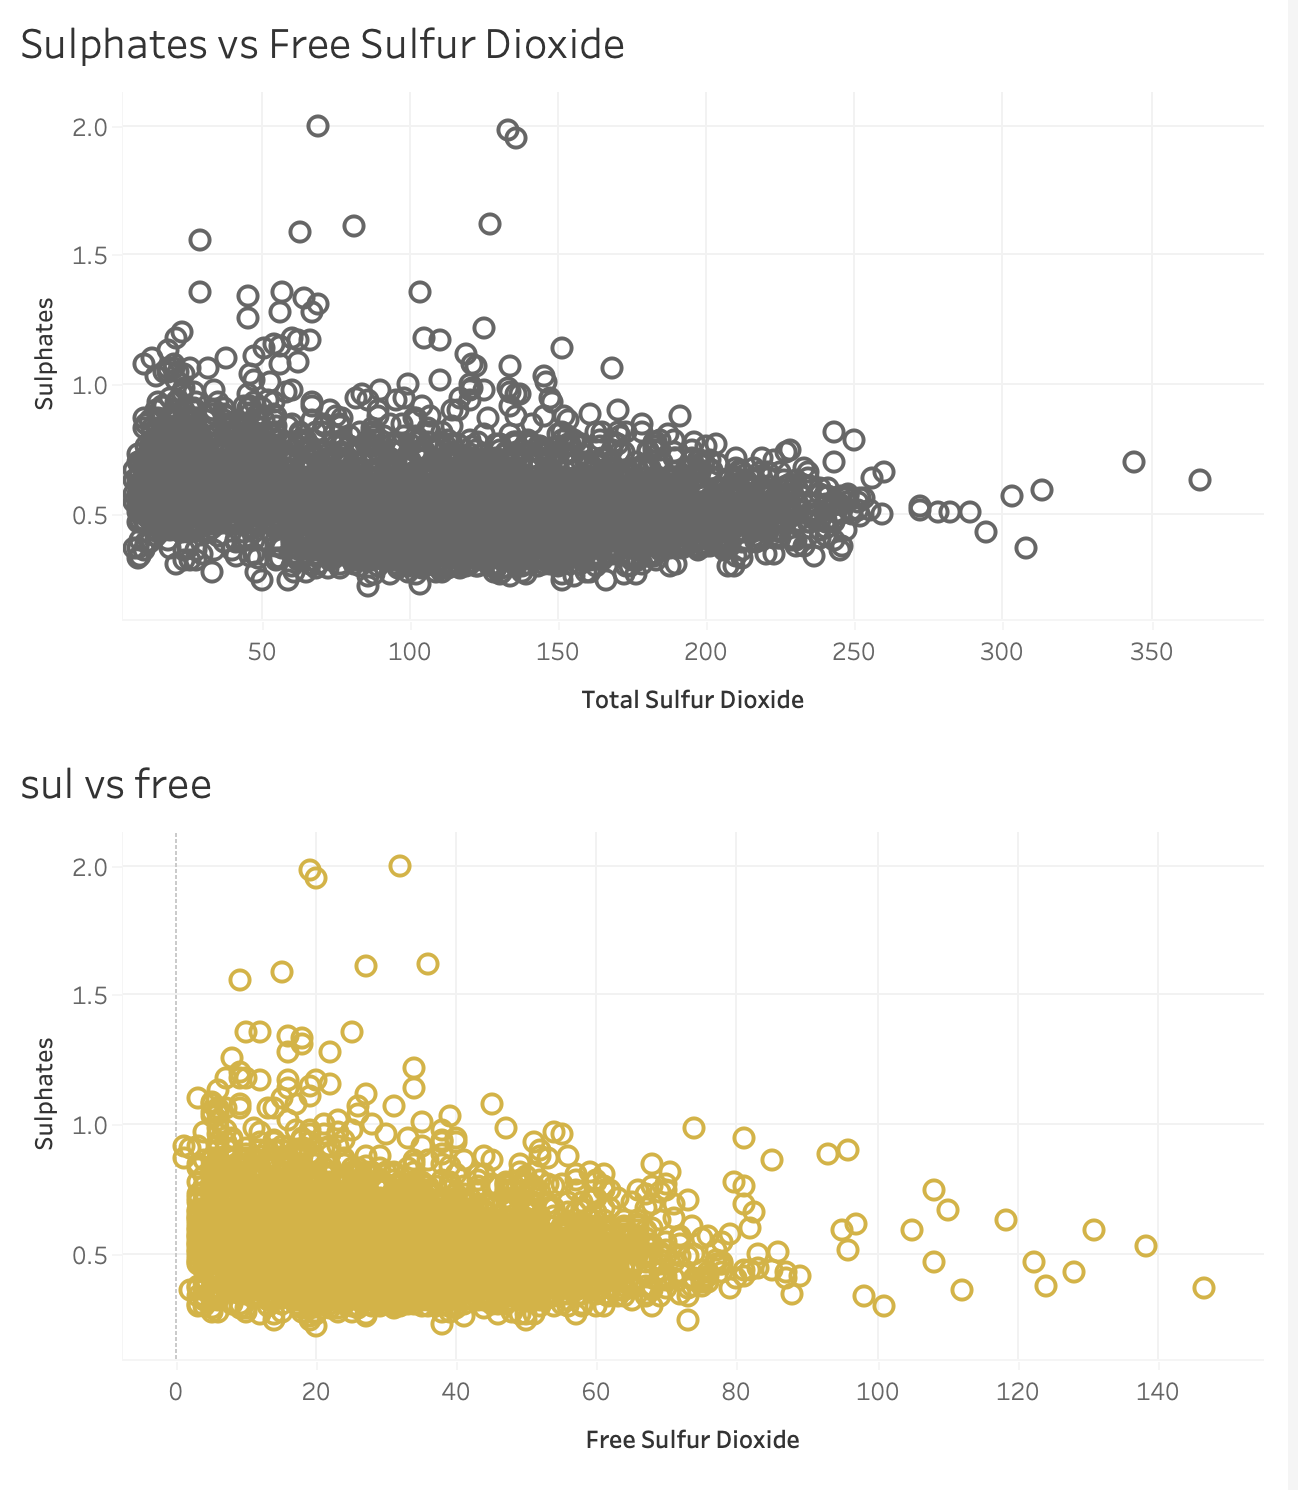

In [20]:
explore.pearsonr_report(train['sulphates'], train['total_sulphur_dioxide'])

T-statistic = -0.2495
p-value     = 0.0000
Is p-value < alpha? True


In [21]:
explore.pearsonr_report(train['sulphates'], train['free_sulphur_dioxide'])

T-statistic = -0.1467
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the pearsonr test, there is enough evidence to reject the null hypothesis and conclude that there is a negative correlation between sulphates and free sulphur dioxide and sulphates and total sulphur dioxide

# Is there a relationship between density and quality?

$H_0$: There is no relationship between density and quality
$H_a$: There is a relationship between density and quality

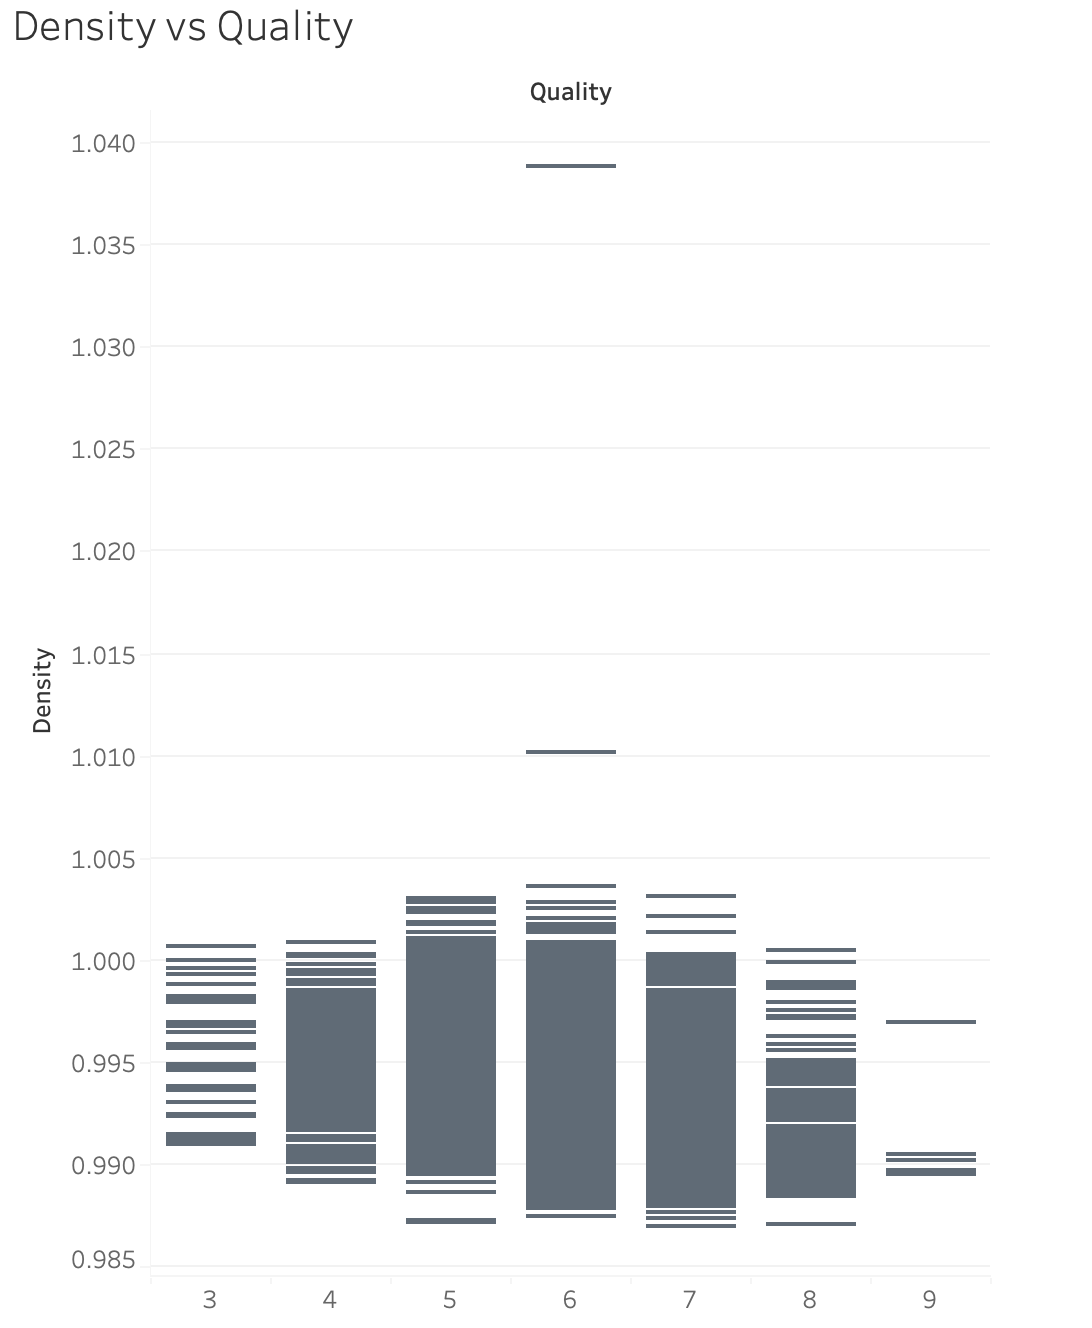

In [22]:
explore.ind_ttest_report(train['quality'], train['density'])

T-statistic = 339.4965
p-value     = 0.0000
Is p-value < alpha? True


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</br>
* Based on the statistical test, there is a relationship between density and quality.